In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('/Users/daniyalrosli/fyp/heart_disease_data.csv')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#read and analyse data

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#Missing Value Analysis

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#Unique value analysis
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trestbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalach -- 91
exang -- 2
oldpeak -- 40
slope -- 3
ca -- 5
thal -- 4
target -- 2


In [14]:
#Categorical Feature Analysis

In [20]:
categorical_list = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
continuous_list = ["age", "trestbps", "chol", "thalach", "oldpeak"]

Error with column 'sex': 'numpy.int64' object has no attribute 'startswith'
Error with column 'cp': 'numpy.int64' object has no attribute 'startswith'
Error with column 'fbs': 'numpy.int64' object has no attribute 'startswith'
Error with column 'restecg': 'numpy.int64' object has no attribute 'startswith'
Error with column 'exang': 'numpy.int64' object has no attribute 'startswith'
Error with column 'slope': 'numpy.int64' object has no attribute 'startswith'
Error with column 'ca': 'numpy.int64' object has no attribute 'startswith'
Error with column 'thal': 'numpy.int64' object has no attribute 'startswith'
Error with column 'target': 'numpy.int64' object has no attribute 'startswith'


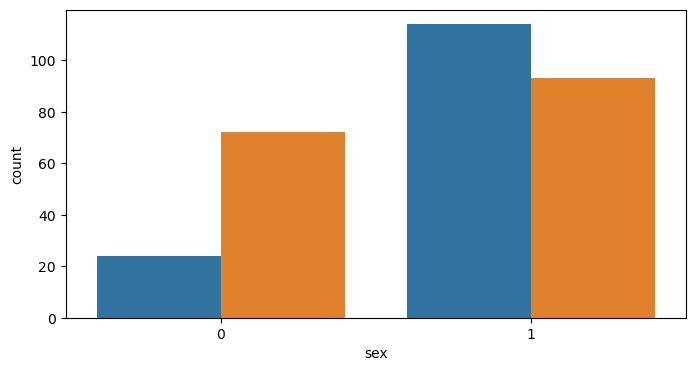

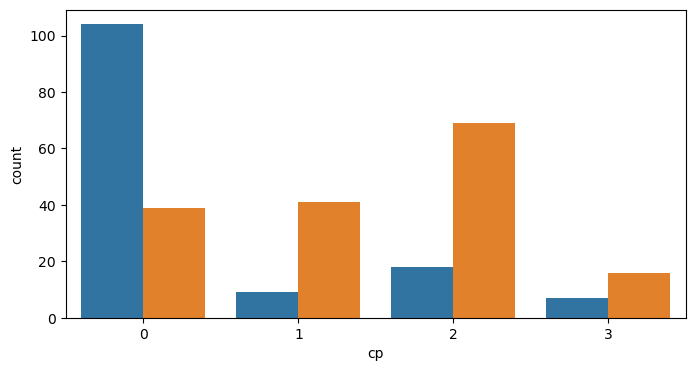

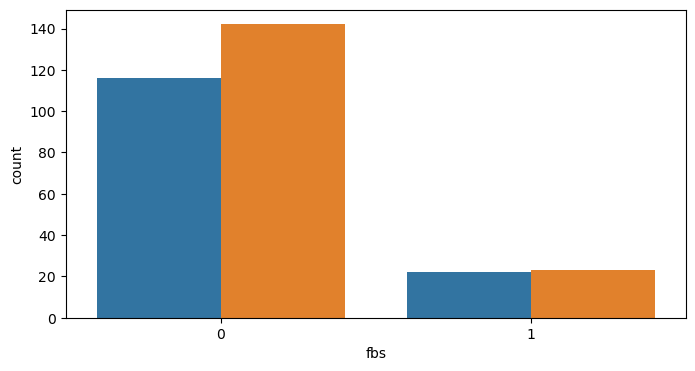

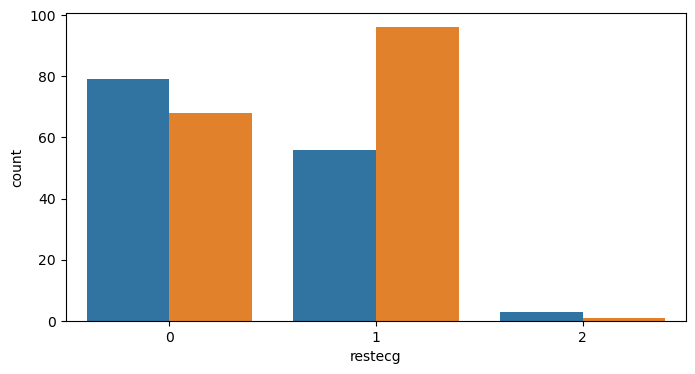

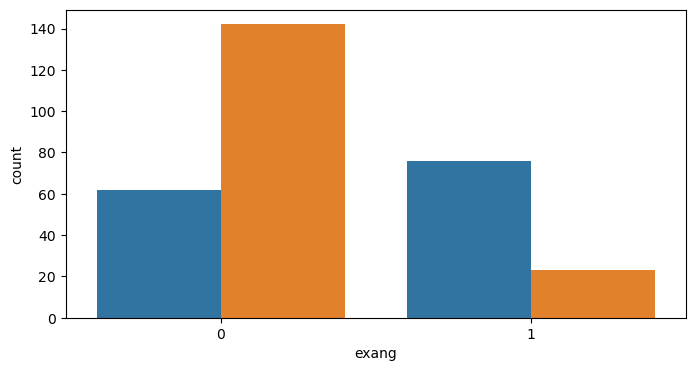

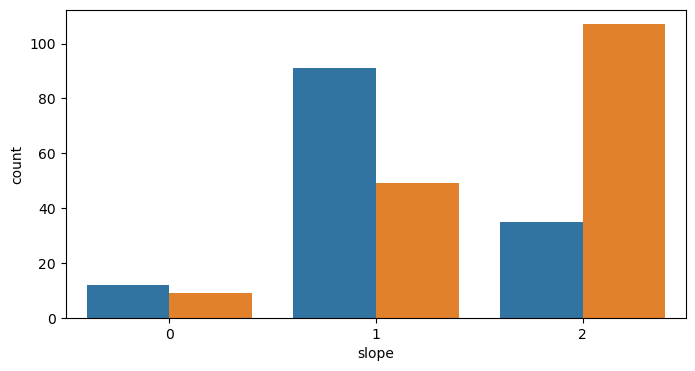

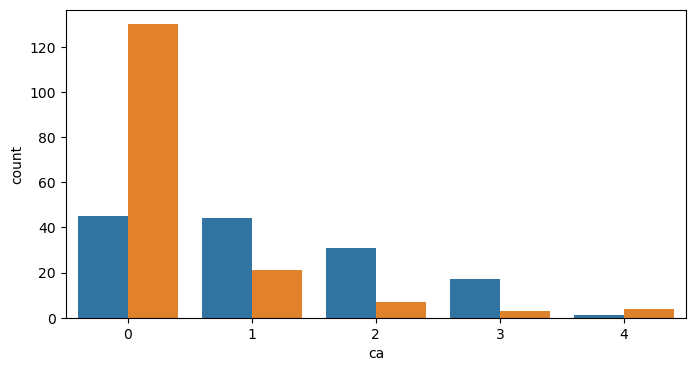

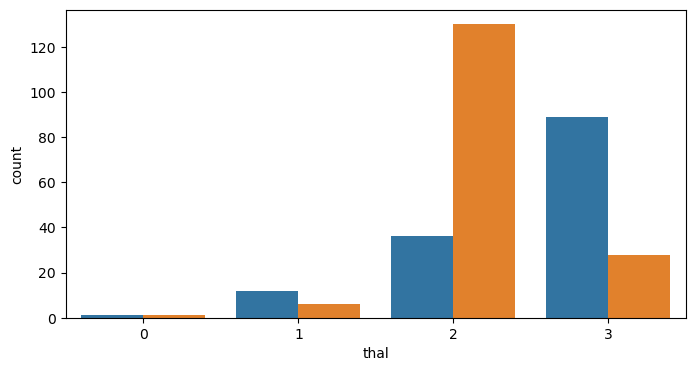

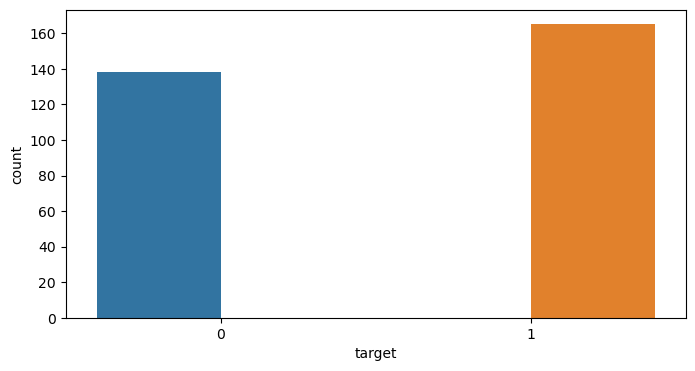

In [22]:
for col in categorical_list:
    try:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, hue='target')
        plt.title(f'Distribution of {col} by Target')
        plt.show()
    except AttributeError as e:
        print(f"Error with column '{col}': {e}")

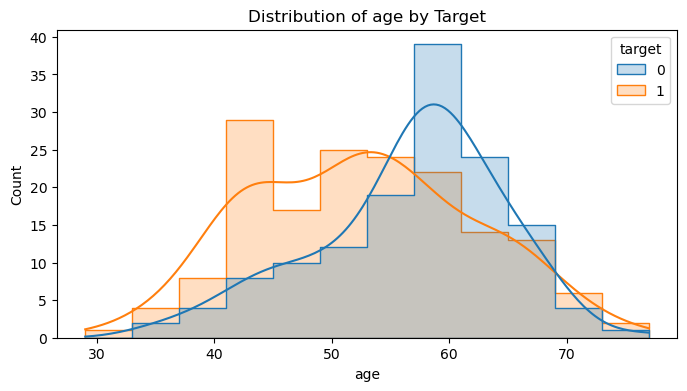

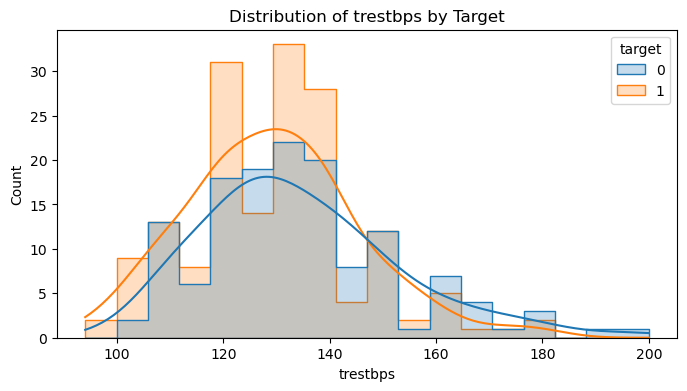

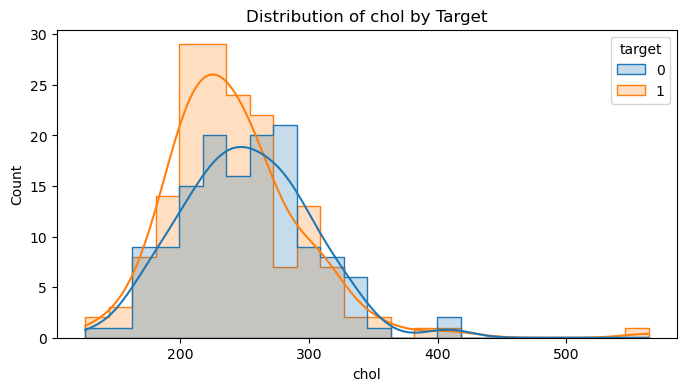

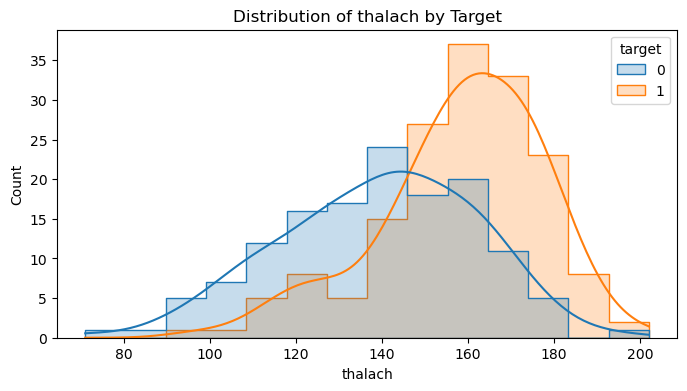

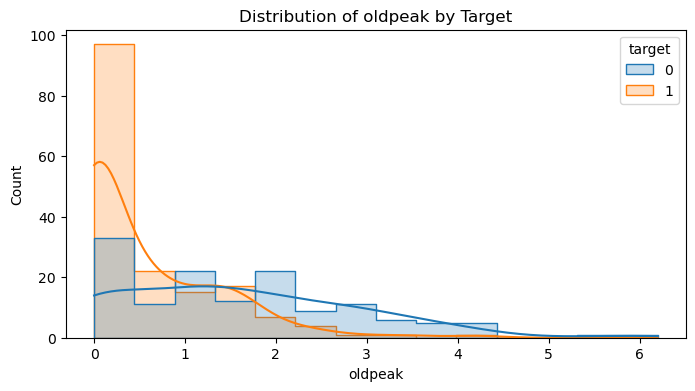

In [23]:
for col in continuous_list:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='target', kde=True, element='step')
    plt.title(f'Distribution of {col} by Target')
    plt.show()

In [24]:
df.dropna(inplace=True)

In [ ]:
#Standardization

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler


StandardScaler()

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

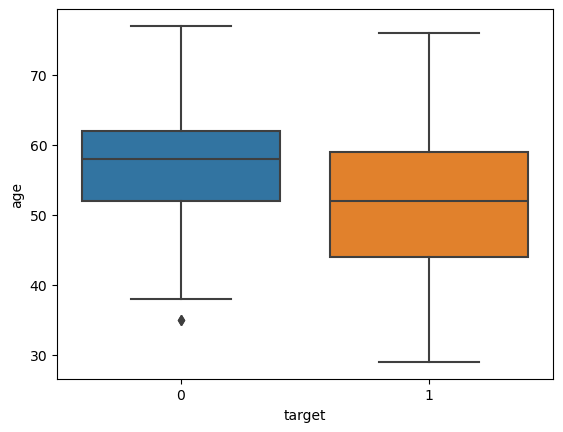

In [13]:
#swarm plot



plt.figure()
sns.boxplot(x='target',y='age',data=df)
plt.show()



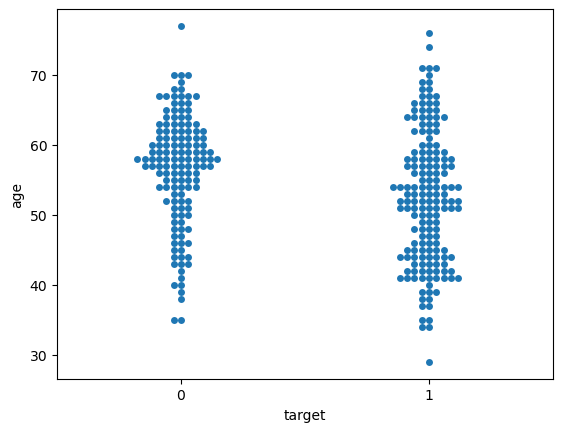

In [14]:
plt.figure()
sns.swarmplot(x='target', y = 'age', data = df)
plt.show()

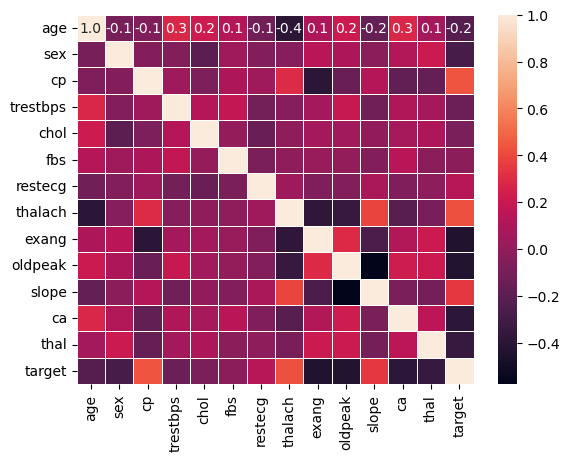

In [15]:
#correlation analysis

plt.figure()
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidth = .7)
plt.show()


In [16]:
#outlier detection

numeric_list = ["age","trestbps","chol","thalach","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
#outlier detection

for i in numeric_list:
    Q1 = np.percentile(df.loc[:, i], 25)
    Q3 = np.percentile(df.loc[:, i], 75)
    IQR = Q3 - Q1

    print("Old shape of {}:".format(i), df.loc[:, i].shape)

    # Define bounds for outliers
    upper_bound = Q3 + 2.5 * IQR
    lower_bound = Q1 - 2.5 * IQR

    # Get index positions of outliers
    upper = np.where(df.loc[:, i] >= upper_bound)[0]
    lower = np.where(df.loc[:, i] <= lower_bound)[0]

    print(f"{i} -- Upper outliers: {len(upper)}, Lower outliers: {len(lower)}")

    # Drop rows with outliers
    df.drop(index=upper, inplace=True, errors='ignore')
    df.drop(index=lower, inplace=True, errors='ignore')

    print(f"New shape after removing outliers from {i}:", df.shape)

Old shape of age: (303,)
age -- Upper outliers: 0, Lower outliers: 0
New shape after removing outliers from age: (303, 14)
Old shape of trestbps: (303,)
trestbps -- Upper outliers: 2, Lower outliers: 0
New shape after removing outliers from trestbps: (301, 14)
Old shape of chol: (301,)
chol -- Upper outliers: 1, Lower outliers: 0
New shape after removing outliers from chol: (300, 14)
Old shape of thalach: (300,)
thalach -- Upper outliers: 0, Lower outliers: 0
New shape after removing outliers from thalach: (300, 14)
Old shape of oldpeak: (300,)
oldpeak -- Upper outliers: 2, Lower outliers: 0
New shape after removing outliers from oldpeak: (298, 14)


In [21]:
#Modeling

In [23]:
#Train/Test split

In [32]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']  

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)


In [40]:
#LR

In [36]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [43]:
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
#probabilities

y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[8.88374395e-01, 1.11625605e-01],
       [2.12890600e-01, 7.87109400e-01],
       [1.88662755e-01, 8.11337245e-01],
       [9.75373596e-01, 2.46264036e-02],
       [6.78255651e-02, 9.32174435e-01],
       [9.06330004e-02, 9.09367000e-01],
       [3.91949426e-01, 6.08050574e-01],
       [9.98996183e-01, 1.00381695e-03],
       [9.95544697e-01, 4.45530303e-03],
       [4.52058244e-01, 5.47941756e-01],
       [2.05367767e-01, 7.94632233e-01],
       [9.31478410e-01, 6.85215896e-02],
       [6.98014649e-02, 9.30198535e-01],
       [9.79553964e-01, 2.04460357e-02],
       [1.61879879e-02, 9.83812012e-01],
       [4.47366116e-02, 9.55263388e-01],
       [2.05009675e-02, 9.79499032e-01],
       [9.52745448e-01, 4.72545521e-02],
       [9.94281831e-01, 5.71816881e-03],
       [9.90399653e-01, 9.60034713e-03],
       [2.65698572e-01, 7.34301428e-01],
       [9.90490372e-01, 9.50962844e-03],
       [8.70220690e-01, 1.29779310e-01],
       [1.97545481e-01, 8.02454519e-01],
       [7.710984

In [45]:
y_pred =np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [46]:
print ("Test accuracy : {}".format(accuracy_score(y_pred, y_test)))

Test accuracy : 0.8852459016393442


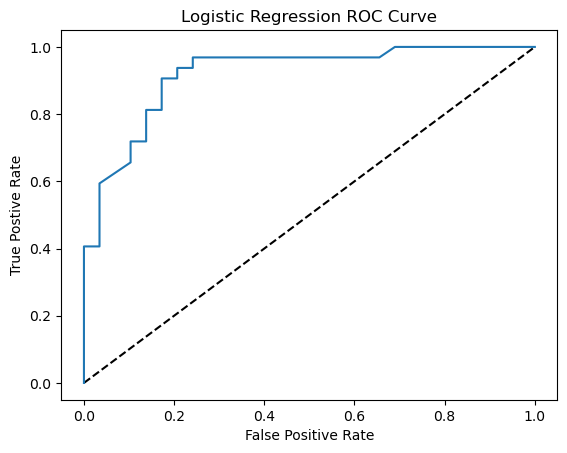

In [54]:

# Get predicted probabilities for the positive class
y_pred_prod = model.predict_proba(X_test)  # Shape: (n_samples, 2)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prod[:, 1])  # Use probabilities of the positive class

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()